In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# ステップ関数
def step_function(x):
    y = x > 0
    return y.astype(np.int64)

In [10]:
x = np.array([-5.0, 0.0, 5.0])

In [11]:
step_function(x)

array([0, 0, 1])

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

Text(0.5, 1.0, 'step')

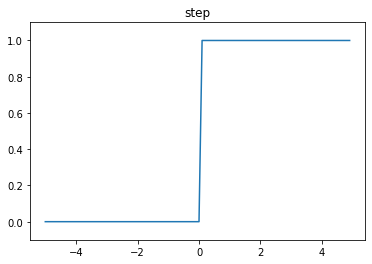

In [17]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title("step")

In [2]:
# シグモイド関数の実装
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
x = np.array([1.0, 2.0, 3.0])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

Text(0.5, 1.0, 'sigmoid')

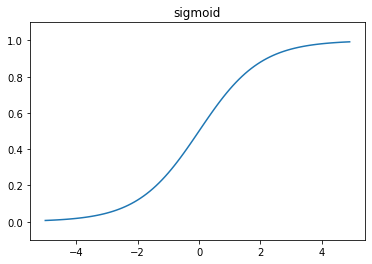

In [7]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title("sigmoid")

(-0.1, 1.1)

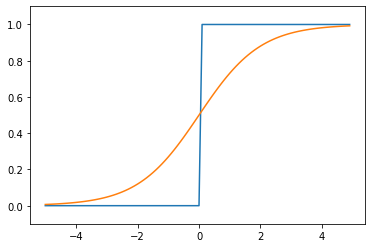

In [20]:
plt.plot(x, step_function(x))
plt.plot(x, sigmoid(x))
plt.ylim(-0.1, 1.1)

In [21]:
def relu(x):
    return np.maximum(0, x)

In [30]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

Text(0.5, 1.0, 'ReLU')

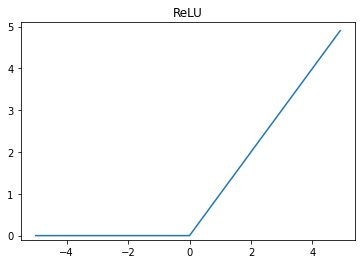

In [32]:
plt.plot(x, y)
plt.ylim(-0.1, 5.1)
plt.title("ReLU")

In [33]:
# 行列の積
A = np.array([[1, 2, 3], [4, 5, 6]])
B = A.reshape(3, 2)

In [35]:
print(A.shape)
print(B.shape)

(2, 3)
(3, 2)


In [36]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [37]:
np.dot(B, A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

In [2]:
# ニューラルネットワークの行列の積
X = np.array([1, 2])
X.shape

(2,)

In [3]:
W = np.array([[1, 3, 5], [2, 4, 6]])
W.shape

(2, 3)

In [5]:
print(X)
print(W)

[1 2]
[[1 3 5]
 [2 4 6]]


In [4]:
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

In [3]:
# 各層における信号伝達の実装
# 入力
X = np.array([1.0, 0.5])
# 重み
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
# バイアス
B1 = np.array([0.1, 0.2, 0.3])

In [4]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [5]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [6]:
# 第二層
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [7]:
A2 = np.dot(Z1, W2) + B2
A2

array([0.51615984, 1.21402696])

In [8]:
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [31]:
# 出力層（恒等関数）
def identity_function(x):
    return x

In [10]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [11]:
A3 = np.dot(Z2, W3) + B3
A3

array([0.31682708, 0.69627909])

In [12]:
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

出力層で利用する一般的な活性化関数  
回帰問題：恒等関数  
２クラス分類問題：シグモイド関数  
多クラス分類問題：ソフトマックス関数  

In [26]:
# ３層ニューラルネットワークまとめ
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2,  0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [39]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [40]:
X = np.array([1.0, 0.5])
network = init_network()
y = forward(network, X)
y

array([0.31682708, 0.69627909])

出力層では一般的に  
回帰問題：恒等関数  
分類問題：ソフトマックス関数(0から１の出力、総和１)
※ニューラルネットワークが分類を行う際、出力層のソフトマックス関数は一般的に省略される

In [2]:
# ソフトマックス関数の実装
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [3]:
a = np.array([0.3, 2.9, 4.0])

In [5]:
y = softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])

In [6]:
b = np.array([1010, 1000, 507])
y2 = softmax(b)
y2

/tmp/ipykernel_75/3952946457.py:3: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
/tmp/ipykernel_75/3952946457.py:5: RuntimeWarning: invalid value encountered in true_divide
  y = exp_a / sum_exp_a


array([nan, nan,  0.])

上のソフトマックス関数の実装だとオーバーフローの問題がある  
↓改善策

In [7]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [9]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])

In [8]:
b = np.array([1010, 1000, 507])
y2 = softmax(b)
y2

array([9.99954602e-001, 4.53978687e-005, 3.54695669e-219])

MNIST

In [21]:
from keras.datasets import mnist

In [26]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [27]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [28]:
from PIL import Image

In [38]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [39]:
img = train_images[0]
label = train_labels[0]
print(label)

5


In [40]:
print(img.shape)

(28, 28)


In [41]:
img_show(img)